In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Separate features and target
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (614, 8)
Testing set size: (154, 8)


In [5]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [7]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)

# Print the first five probabilities
print(y_prob[:5])


[[0.72412406 0.27587594]
 [0.81156906 0.18843094]
 [0.88551826 0.11448174]
 [0.8364479  0.1635521 ]
 [0.5284826  0.4715174 ]]


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes


In [11]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for convenience
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target column

# Display the first few rows of the dataset
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [12]:
# Features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (353, 10)
Testing set size: (89, 10)


In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [14]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2900.19
R-squared: 0.45


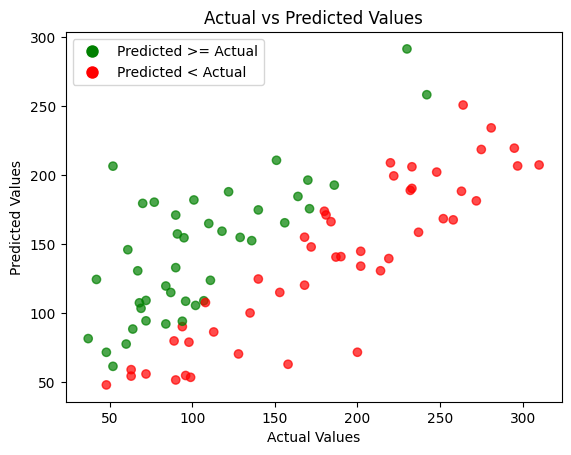

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of colors based on the difference between actual and predicted values
color = np.where(y_pred >= y_test, 'green', 'red')  # Green for predicted >= actual, Red for predicted < actual

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, c=color, alpha=0.7)  # Color points according to their difference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a legend
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Predicted >= Actual')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted < Actual')
plt.legend(handles=[green_patch, red_patch])

plt.show()



In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes


In [18]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for convenience
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target column

# Display the first few rows of the dataset
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [19]:
# Convert target to binary classification (0: no diabetes, 1: diabetes)
y = (data['target'] > data['target'].median()).astype(int)  # 1 for high target, 0 for low target
X = data.drop(columns=['target'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (353, 10)
Testing set size: (89, 10)


In [20]:
# Initialize the Support Vector Machine classifier
model = SVC(kernel='linear')  # You can also use other kernels like 'rbf'

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[39 10]
 [12 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        49
           1       0.74      0.70      0.72        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



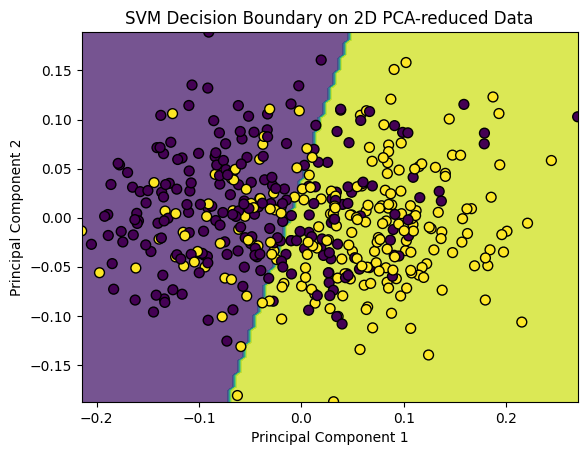

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the SVM model again on the 2D data
model.fit(X_train_reduced, y_train)

# Plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100))

# Predict for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary on 2D PCA-reduced Data')
plt.show()
